<a href="https://colab.research.google.com/github/dravichi/Data-Analytics/blob/main/Training_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Market Entry Analysis for ABG Motors in India**

In [ ]:
!pip install -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.3 MB/s eta 0:00:00


**Import Essentials Libraries**

In [ ]:
import warnings
import pylab
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch
warnings.filterwarnings("ignore")

## **EDA**

**Initialize Dataset**

In [ ]:
df_jp = pd.read_excel('JPN Data.xlsx')

**Data Overview**

In [ ]:
df_jp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          40000 non-null  object 
 1   CURR_AGE    40000 non-null  int64  
 2   GENDER      40000 non-null  object 
 3   ANN_INCOME  40000 non-null  float64
 4   AGE_CAR     40000 non-null  int64  
 5   PURCHASE    40000 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.8+ MB


In [ ]:
df_jp.describe().T

,count,mean,std,min,25%,50%,75%,max
CURR_AGE,40000.0,44.997450,11.820080,25.0,35.0,45.000000,55.0,65.000000
ANN_INCOME,40000.0,359398.878050,175109.262950,70089.0,219766.0,337656.833333,464261.0,799970.666667
AGE_CAR,40000.0,359.080250,203.063724,1.0,235.0,331.000000,444.0,1020.000000
PURCHASE,40000.0,0.575775,0.494231,0.0,0.0,1.000000,1.0,1.000000


In [ ]:
df_jp.head()

,ID,CURR_AGE,GENDER,ANN_INCOME,AGE_CAR,PURCHASE
0,00001Q15YJ,50,M,445344.000000,439,0
1,00003I71CQ,35,M,107634.000000,283,0
2,00003N47FS,59,F,502786.666667,390,1
3,00005H41DE,43,M,585664.000000,475,0
4,00007E17UM,39,F,705722.666667,497,1


**Data Visualization**

Numerical (Discrete) Features

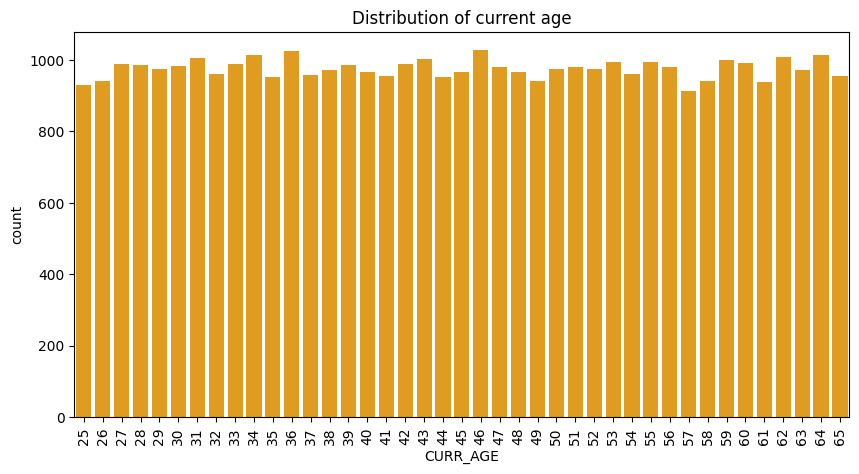

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df_jp, x='CURR_AGE', color='orange').set_title('Distribution of current age')
plt.xticks(rotation=90)
plt.show()

**Insight gained from the count plot:**

The CURR_AGE is one of the feature that considered as discrete data since it is rounded to the nearest year. As we can see the CURR_AGE feature is distributed equally around 900 to 1000. There is no significant trend in this feature. The CURR_AGE is ranging from 25 to 65.

Numerical (Continuous) Features

In [ ]:
def plot_data(feature, name):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(df_jp, x=feature, kde=True).set_title(f'Distribution of {name}')
    plt.subplot(1,2,2)
    stats.probplot(df_jp[feature],dist='norm',plot=pylab)
    plt.title(f'Probability of {name}')
    plt.show()

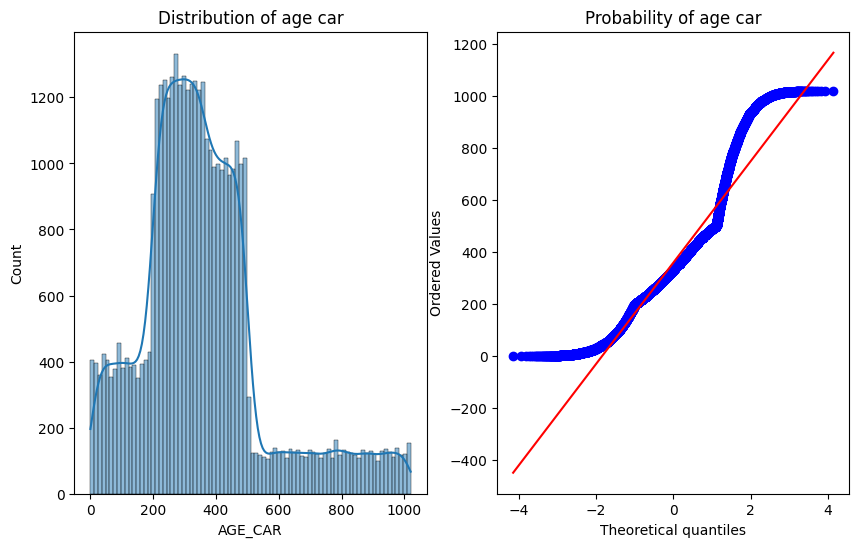

In [ ]:
plot_data('AGE_CAR', 'age car')

**Insight gained from the histogram plot:**

The AGE_CAR is one of the feature that considered as continuous data. As we can see the AGE_CAR feature is highly distributed at range around 220 to 480. From around 480 and above, the distribution values drop significantly which is less than 200.

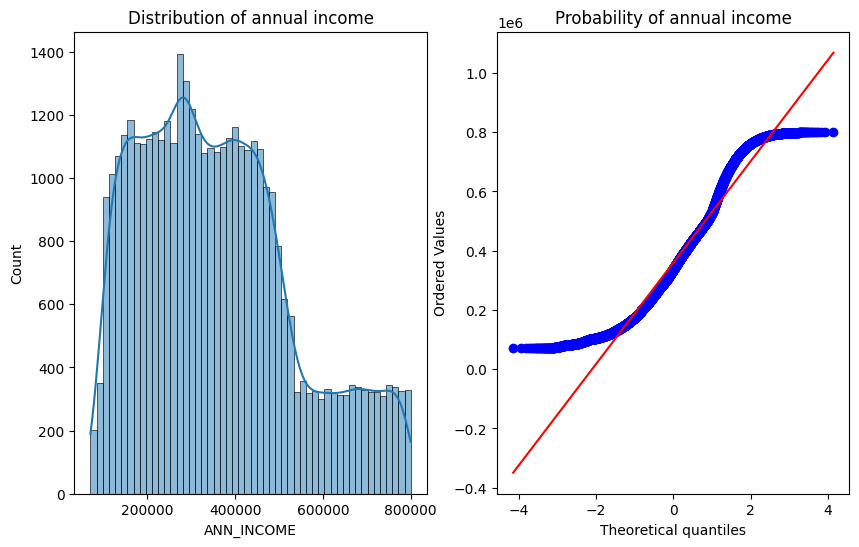

In [ ]:
plot_data('ANN_INCOME', 'annual income')

**Insight gained from the histogram plot:**

The ANN_INCOME is one of the feature that considered as continuous data. As we can see the ANN_INCOME feature is highly distributed at range 115000 to 475000. The distribution of people with high annual income (more than 500000) is low with values less than 400.

Categorical Features

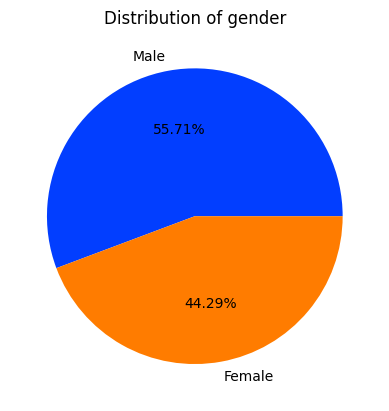

In [ ]:
palette = sns.color_palette('bright')
M = len(df_jp[df_jp['GENDER'] == 'M'])
F = len(df_jp) - M
plt.pie([M, F], labels=['Male', 'Female'],colors=palette, autopct='%.2f%%')
plt.title('Distribution of gender')
plt.show()

**Insight gained from pie chart**

The GENDER is one of the feature that considered as categorical data. As we can see there are more male than female in the data. The data consists of 44% of female and 56% of female. The difference between genders is 4500.

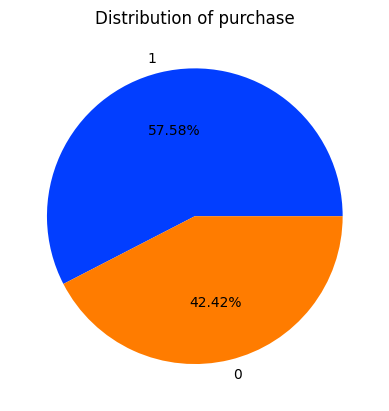

In [ ]:
P = len(df_jp[df_jp['PURCHASE'] == 1])
N = len(df_jp) - P
plt.pie([P, N], labels=[1, 0],colors=palette, autopct='%.2f%%')
plt.title('Distribution of purchase')
plt.show()

**Insight gained from pie chart**

The PURCHASE is one of the feature that considered as categorical data. As we can see there are more purchase (1) than non-purchase (0) in the data. The data consists of 42% of non-purchase (0) and 58% of purchase (1). The difference purchase and non-purchase is approximately 6000.

Relation with respect to Purchase Feature

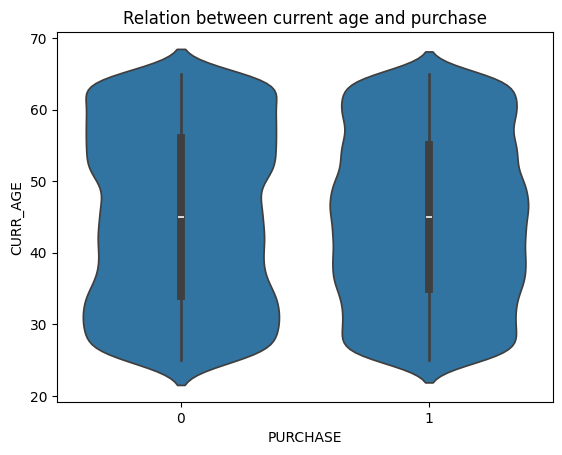

In [ ]:
sns.violinplot(df_jp, x="PURCHASE", y="CURR_AGE").set_title('Relation between current age and purchase')
plt.show()

**Insight gained from the violin plot:**

The median of CURR_AGE in both graphs is 45. From the distribution of CURR_AGE, we can assume that this feature has less significant impact to the PURCHASE feature.

 In the **Non-Purchase Graph (0)**, the CURR_AGE range of 38-48 has a low distribution. It means that fewer people do not purchase the vehicle in this range.
 On the other hand, in the **Purchase Graph (1)**, the CURR_AGE of range 34-51 has a high distribution means that more people in these ages purchase the vehicle. Moreover, overall, we can also see that lower age tends to not purchase the vehicle. These two graphs support each other.

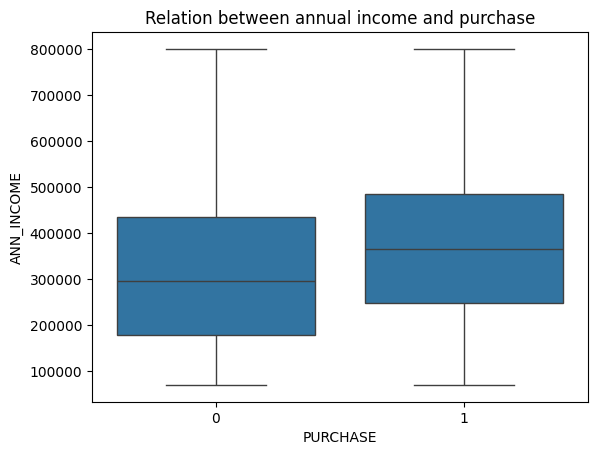

In [ ]:
sns.boxplot(df_jp, x="PURCHASE", y="ANN_INCOME").set_title('Relation between annual income and purchase')
plt.show()

**Insight gained from the violin plot:**

The median in the **Non-Purchase Graph (0)** is around 290000. This value is lower than the **Purchase Graph (1)**, which is around 360000. This indicates that people with higher salaries have more tendency to buy the car. Moreover, we can check that there are no outliers in the data, which is good.

In detail, we can see the peak distribution of ANN_INCOME in the **Non-Purchase Graph (0)** is around 135k. Furthermore, for higher ANN_INCOME, let's say 575k and above, the distribution in the **Purchase Graph (1)** is higher than the **Non-Purchase Graph (0)**. These both graphs support each other.

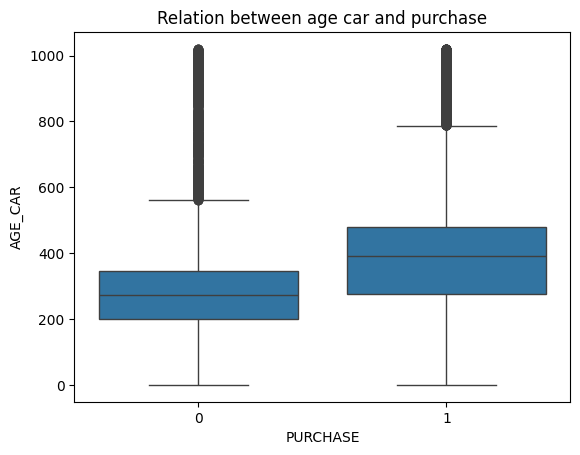

In [ ]:
sns.boxplot(df_jp, x="PURCHASE", y="AGE_CAR").set_title('Relation between age car and purchase')
plt.show()

**Insight gained from the boxplot:**

As we can see, the **Non-Purchase Graph (0)** has lower median in comparison to the **Purchase Graph (1)**. It clearly shows us that higher age car has more tendency to purchase a vehicle.

However there are a lot of outliers in both graphs. The **Non-Purchase Graph (0)** has outliers in range around 600 and above, whereas the **Purchase Graph (1)** has outliers in range around 800 and above. This problem should be our concern in feature engineering step.

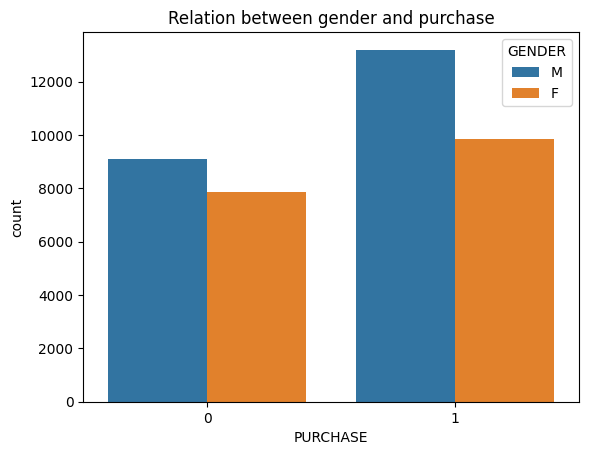

In [ ]:
sns.countplot(df_jp, x="PURCHASE", hue="GENDER").set_title('Relation between gender and purchase')
plt.show()

**Insight gained from the histogram:**

The male has higher numbers in both the **Non-Purchase Graph (0)** and the **Purchase Graph (1)**.

As we can see, the difference between males and females in **Non-Purchase Graph (0)** is not significant, which is around 1200. Whereas, the difference between males and females in **Purchase Graph (1)** is quite significant, which is around 3350. In summary, the male has more tendency to purchase the car than the female.

## **Classification Model for Japanese Market**

**Features Engineering**

In [ ]:
# Checking for null data
df_jp.isnull().sum().sort_values(ascending=False)

ID            0
CURR_AGE      0
GENDER        0
ANN_INCOME    0
AGE_CAR       0
PURCHASE      0
dtype: int64

In [ ]:
# Checking for duplicate data
df_jp.duplicated().any()

False

In [ ]:
# Encoding gender attribute
encoder = LabelEncoder()
df_jp['GENDER']=encoder.fit_transform(df_jp['GENDER'])

# Dividing maintenance days (age car) into segments
df_jp['SEGMENT'] = np.where(
    df_jp['AGE_CAR'] < 200, 1, np.where(
    df_jp['AGE_CAR'] <= 360, 2, np.where(
    df_jp['AGE_CAR'] <= 500, 3, 4
    )))

In [ ]:
# Dropping unnecessary attributes
df_jp.drop(columns=['ID', 'AGE_CAR'], inplace=True)

In [ ]:
# Reducing skewness on annual income feature
df_jp['ANN_INCOME'] = stats.boxcox(df_jp['ANN_INCOME'], lmbda=0.8)

In [ ]:
# Scaling all features ranging from 0 to 1
scaler = MinMaxScaler()
temp = scaler.fit_transform(df_jp)
df_jp = pd.DataFrame(temp, columns=df_jp.columns)

**Features Selection**

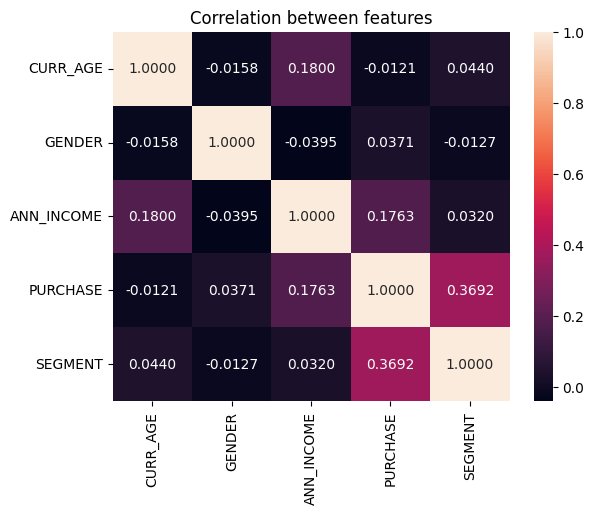

In [ ]:
numerical = df_jp.select_dtypes(include=np.number).corr()
sns.heatmap(numerical, annot=True, fmt=".4f").set_title('Correlation between features')
plt.show()

**Insight gained from the heatmap:**
1. CURR_AGE: This attribute has a very weak correlation to the PURCHASE attribute (-0.012). Since it is a negative correlation, it means less age has more tendency to purchase the vehicle.
2. GENDER: This attribute has a weak correlation to the PURCHASE attribute (0.037). Since it is a positive correlation, it means male has more tendency to purchase the vehicle.
3. ANN_INCOME: This attribute has quite a strong correlation to the PURCHASE attribute (0.176). Since it is a positive correlation, it means higher income has more tendency to purchase the vehicle.
4. SEGMENT: This attribute has the strongest correlation to the PURCHASE attribute compared to others (0.369). Since it is a positive correlation, it means that higher segments have more tendency to purchase the vehicle.

In [ ]:
# Defining dependent and independent variables
X = df_jp.drop(['PURCHASE', ], axis=1)
y = df_jp['PURCHASE']

In [ ]:
# Selecting features based on Lasso
ft_selection = SelectFromModel(Lasso(alpha=0.01, random_state=42))
ft_selection.fit(X, y)

SelectFromModel(estimator=Lasso(alpha=0.01, random_state=42))

In [ ]:
# Selected features
selected_ft = X.columns[(ft_selection.get_support())]

print(f'Total features: {X.shape[1]}')
print(f'Selected features: {len(selected_ft)}')
print(f'Features with coefficients shrank to zero: {np.sum(ft_selection.estimator_.coef_ == 0)}')

Total features: 4
Selected features: 3
Features with coefficients shrank to zero: 1


In [ ]:
# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(df_jp[selected_ft], y, test_size=0.2, random_state=42)

**Model Selection**

In [ ]:
# Defining Deep Learning build model function
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 25)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=1024,
                                            step=32),
                                            activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [ ]:
# Hyper parameter tunning for Deep Learning
tuner = RandomSearch(
    build_model,
    objective='accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='Project',
    project_name='Summer Training')

tuner.search(X_train, y_train,
             epochs=5,
             validation_data=(X_test, y_test))

Trial 5 Complete [00h 25m 27s]
accuracy: 0.6854166785875956

Best accuracy So Far: 0.6879270871480306
Total elapsed time: 01h 21m 02s


In [ ]:
# Selecting best machine learning model
models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForest': RandomForestClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'SVC': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'XGBoost': XGBClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = round(float(str(accuracy_score(y_test, y_pred))[:6])*100, 2)
    print(name, 'Analysis\n')
    print(f"Accuracy: {accuracy}%\n")

LogisticRegression Analysis

Accuracy: 68.77%

RandomForest Analysis

Accuracy: 62.97%

DecisionTree Analysis

Accuracy: 62.75%

SVC Analysis

Accuracy: 68.78%

KNeighborsClassifier Analysis

Accuracy: 67.61%

XGBoost Analysis

Accuracy: 69.8%



In [ ]:
# Hyper parameter tunning for XGBoost Model
params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.15, 0.2],
    'subsample': [0.5, 0.6, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.4, 0.6, 0.8, 1.0],
    'gamma': stats.expon(scale=.1)
}
random = RandomizedSearchCV(models['XGBoost'], param_distributions=params, n_iter=20, scoring='roc_auc', n_jobs=-1, cv=5, verbose=3)
random.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.4, 0.6, 0.8,
                                                             1.0],
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x78fcc6348df0>,
                                        'learning_rate': [0.01, 0.02, 0.03,
                                                          0.04, 0.05, 0.1, 0.15,
                                                          0.2],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 0.6, 0.8, 0.9, 1.0]},
                   scoring='roc_auc', verbose=3)

In [ ]:
# Best parameters for XGBoost model
xgb_best = random.best_estimator_
xgb_best

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.256881761539366, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Model Evaluation
xgb_pred = xgb_best.predict(X_test)
print('XGBoost Hyperparameter Tuned Analysis\n')
print('XGBoost Best Parameters:', random.best_params_)
accuracy = round(float(str(accuracy_score(y_test, xgb_pred))[:6])*100, 2)
conf_matrix = confusion_matrix(y_test, xgb_pred)
classification_rep = classification_report(y_test, xgb_pred)
print(f"\nAccuracy: {accuracy}%")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

XGBoost Hyperparameter Tuned Analysis

XGBoost Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0.256881761539366, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 500, 'subsample': 0.6}

Accuracy: 70.38%
Confusion Matrix:
[[2404  945]
 [1424 3227]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.63      0.72      0.67      3349
         1.0       0.77      0.69      0.73      4651

    accuracy                           0.70      8000
   macro avg       0.70      0.71      0.70      8000
weighted avg       0.71      0.70      0.71      8000



## **Prediction of Potential Customer in The Indian Market Based on The Model**

**Initialize Dataset**

In [ ]:
df_in = pd.read_excel('IN_Data.xlsx')

**Data Overview**

In [ ]:
df_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          70000 non-null  object        
 1   CURR_AGE    70000 non-null  int64         
 2   GENDER      70000 non-null  object        
 3   ANN_INCOME  70000 non-null  int64         
 4   DT_MAINT    70000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 2.7+ MB


In [ ]:
df_in.describe()

,CURR_AGE,ANN_INCOME,DT_MAINT
count,70000.000000,7.000000e+04,70000
mean,44.995314,1.148679e+06,2018-06-28 16:10:28.662856960
min,25.000000,3.000330e+05,2016-09-14 00:00:00
25%,35.000000,8.568238e+05,2018-03-15 00:00:00
50%,45.000000,1.125152e+06,2018-07-26 00:00:00
75%,55.000000,1.438676e+06,2018-12-24 00:00:00
max,65.000000,1.999989e+06,2019-06-30 00:00:00
std,11.822122,3.994505e+05,NaN


In [ ]:
df_in.head()

,ID,CURR_AGE,GENDER,ANN_INCOME,DT_MAINT
0,20710B05XL,54,M,1425390,2018-04-20
1,89602T51HX,47,M,1678954,2018-06-08
2,70190Z52IP,60,M,931624,2017-07-31
3,25623V15MU,55,F,1106320,2017-07-31
4,36230I68CE,32,F,748465,2019-01-27


**Feature Engineering**

In [ ]:
# Checking for null data
df_in.isnull().sum().sort_values(ascending=False)

ID            0
CURR_AGE      0
GENDER        0
ANN_INCOME    0
DT_MAINT      0
dtype: int64

In [ ]:
# Checking for duplicate data
df_in.duplicated().any()

False

In [ ]:
# Encoding gender attribute
encoder = LabelEncoder()
df_in['GENDER']=encoder.fit_transform(df_in['GENDER'])

# Modifying date maintenance into maintenance days (simplifying date for everyone in Indian dataset as 1st July 2019)
df_in['DT_MAINT'] = (np.datetime64('2019-07-01') - df_in['DT_MAINT']).dt.days.astype('int64')

# Converting INR to JPY
df_in['ANN_INCOME'] = df_in['ANN_INCOME'] * 0.52

# Dividing maintenance days into segments
df_in['SEGMENT'] = np.where(
    df_in['DT_MAINT'] < 200, 1, np.where(
    df_in['DT_MAINT'] <= 360, 2, np.where(
    df_in['DT_MAINT'] <= 500, 3, 4
    )))

In [ ]:
# Dropping unnecessary attributes
df_in.drop(columns=['ID', 'DT_MAINT'], inplace=True)

In [ ]:
# Scaling all features ranging from 0 to 1
scaler = MinMaxScaler()
temp = scaler.fit_transform(df_in)
df_in = pd.DataFrame(temp, columns=df_in.columns)

In [ ]:
# Predict the Indian Market using the hyper-tuned XGBoost model
df_in['PURCHASE'] = xgb_best.predict(df_in[selected_ft])

**Data Visualization**

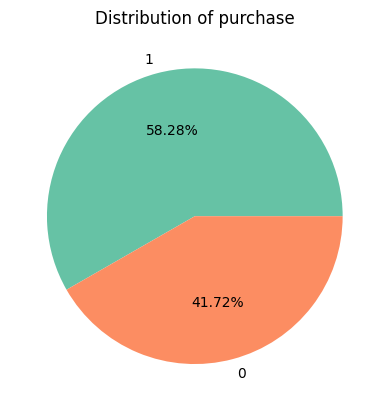

In [ ]:
palette = sns.color_palette('Set2')
P = len(df_in[df_in['PURCHASE'] == 1])
N = len(df_in) - P
plt.pie([P, N], labels=[1, 0],colors=palette, autopct='%.2f%%')
plt.title('Distribution of purchase')
plt.show()

**Insight gained from pie chart:**

Created a good prediction model with an accuracy of 70.38% using XGBoost Classifier. As we know, a machine learning model with an accuracy ranging from 70% to 90% is considered an ideal and realistic model.

Concluded that entering the Indian market is a good decision for ABG Motors. Based on the prediction from the created model, there will be approximately 58.28% of potential customers.